# package_LAB

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

from importlib import reload

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

import package_LAB
package_LAB = reload(package_LAB)
from package_LAB import LL_RT, LL, PID_RT, IMC, Controller, margins

## LL_RT()

In [3]:
help(LL_RT)

Help on function LL_RT in module package_LAB:

LL_RT(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    The function "LL_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method (Not implemented yet)
    
    The function "LL_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 100.0)

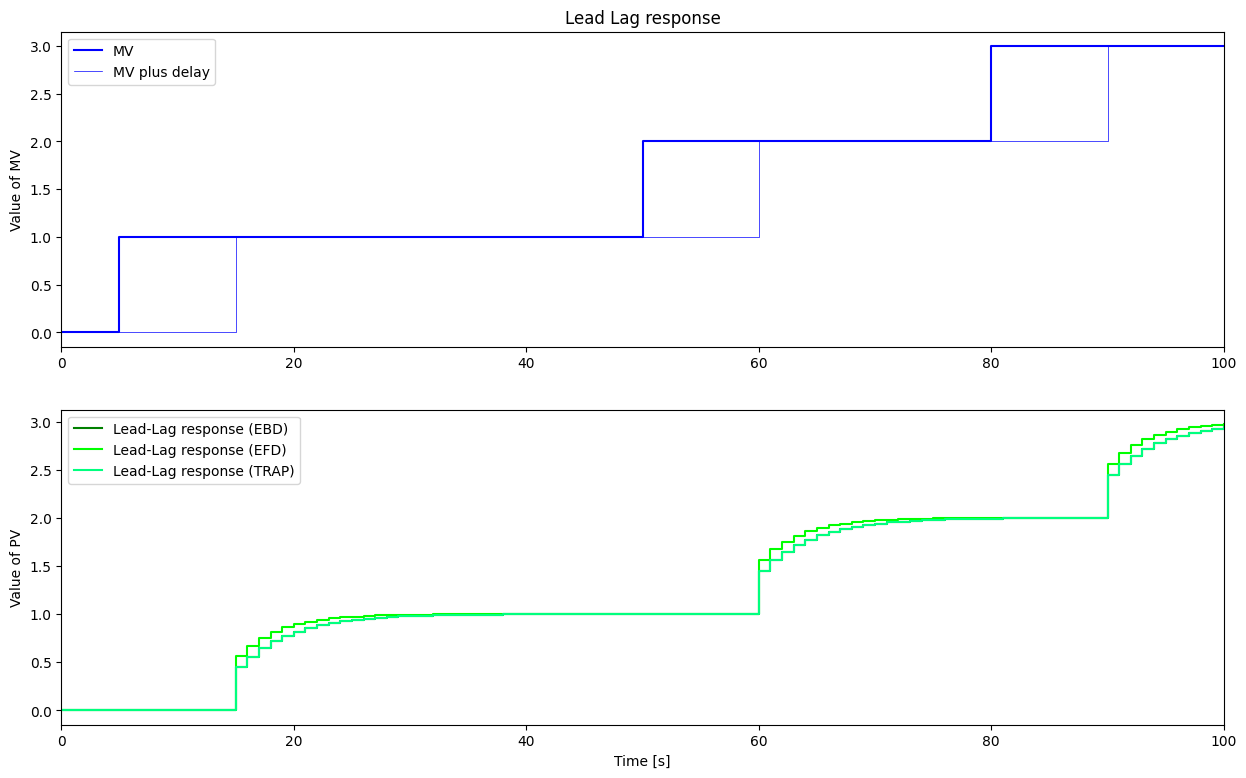

In [4]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead = 5
Tlag = 4
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV) #Permet de chopper la valeur de MV selon MVPath et t
    Delay_RT(MV,theta,Ts,MVDelay)
    LL_RT(MVDelay,Kp,Tlead, Tlag,Ts,PV_EBD)
    LL_RT(MVDelay,Kp,Tlead, Tlag,Ts,PV_EFD,0,'EFD')
    LL_RT(MVDelay,Kp,Tlead, Tlag,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('Lead Lag response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='Lead-Lag response (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='Lead-Lag response (EFD)',where='post')
plt.step(t,PV_TRAP,'springgreen',label='Lead-Lag response (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

PID_RT()

In [5]:
help(PID_RT)

Help on function PID_RT in module package_LAB:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    The function "PID_RT" needs to be included in a -for or while loop".
    
    :SP: SP (or SetPoint) vector
    :PV: PV (or Process Value) vector 
    :Man: Man (or Manual controller mode) vector (True or False) 
    :MVMan: MVMan (or Manual value for MV) vector 
    :MVFF: MVFF (or Feedforward) vector 
    
    :Kc: controller gain 
    :Ti: integral time constant [s] 
    :Td: derivative time constant [s] 
    :alpha: Tfd = alpha*Td where Tfd is the derivative filter time constant [s] 
    :Ts: sampling period [s]
    
    :MVMin: minimum value for MV (used for saturation and anti wind-up) 
    :MVMax: maximum value for MV (used for saturation and anti wind-up) 
    
    :MV: MV (or Manipulated Value) vector 
    :MVP: MVP (or Propotional part of MV) vector 
    :MVI: MVI (or Integral part of MV) vector

(0.0, 1500.0)

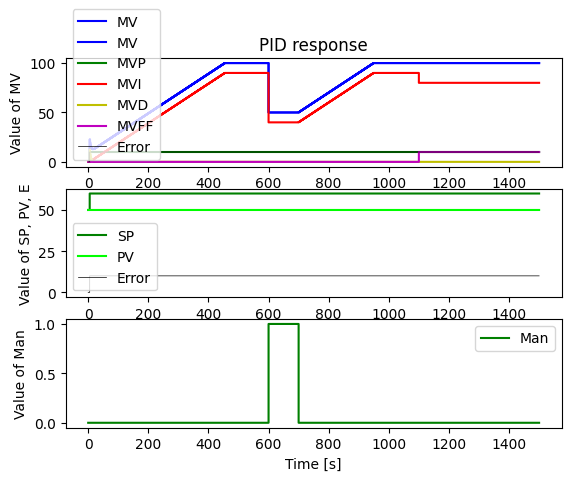

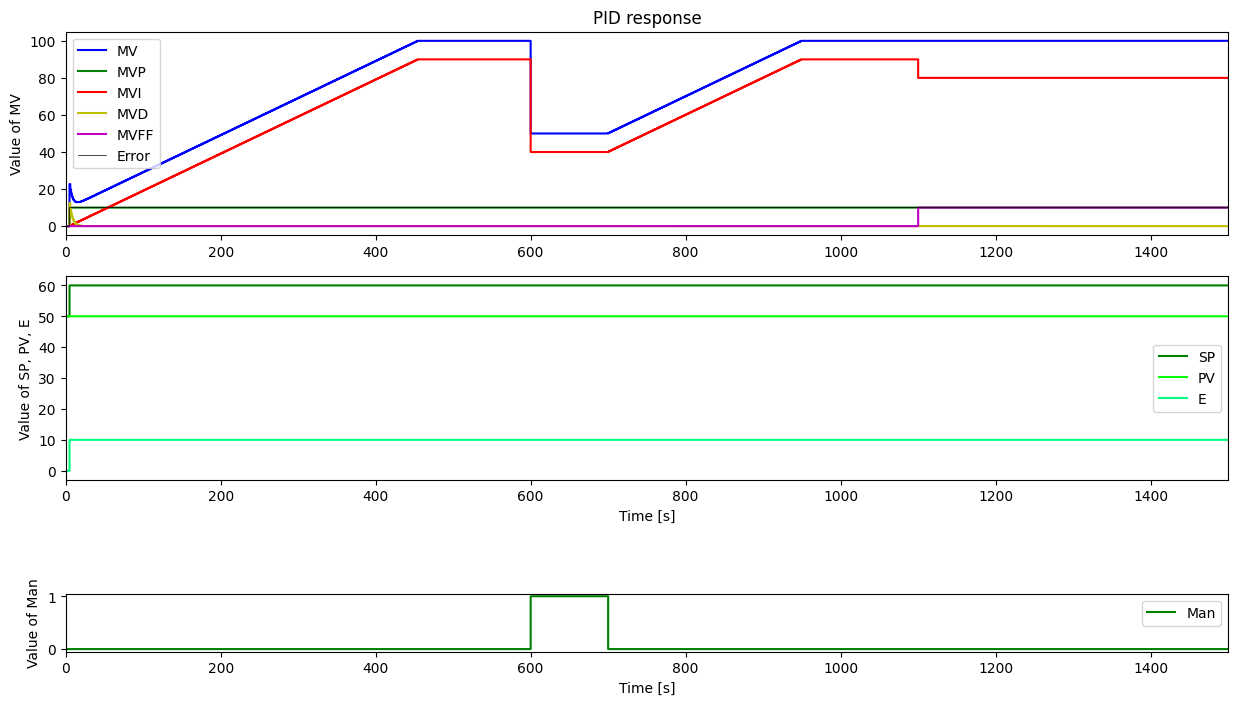

In [6]:
TSim = 1500
Ts = 1
N = int(TSim/Ts) + 1

# Path for variables
MVManPath = {0:50, TSim:50}
SPPath = {0: 50, 5: 60, TSim : 60}
PVPath = {0:50, 5:50, TSim:50}

ManPath = {0: False, 600: True, 700:False, TSim : False}
MVFFPath = {0:0, 1100: 10, TSim : 10}

t = []
SP = []
PV = []
MV = []
MVP = []
MVI = []
MVD = []
Man = []
MVMan = []
MVFF = []
E = []

# Parameters
# à remplacer
Kc = 1 
Ti = 50
Td = 5
alpha = 0.6
MVMin = 0
MVMax = 100

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(MVFFPath,t,MVFF)
    
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E)

'''
print(SP)
print(PV)
print(MV)
print(MVP)
print(MVI)
print(MVD)'
'''

# comparer les 2 méthodes de graph

fig, ((ax1,ax2,ax3)) = plt.subplots(nrows=3, ncols=1)
ax1.step(t,MV,'b-',label='MV',where='post')
ax1.step(t,MV,'b-',label='MV',where='post')
ax1.step(t,MVP,'g-',label='MVP',where='post')
ax1.step(t,MVI,'r-',label='MVI',where='post')
ax1.step(t,MVD,'y-',label='MVD',where='post')
ax1.step(t,MVFF,'m-',label='MVFF',where='post')
ax1.step(t,E,'k-',linewidth=0.5,label='Error',where='post')
ax1.set(ylabel='Value of MV')
ax1.set_title('PID response')
ax1.legend(loc='best')

ax2.step(t,SP,'g-',label='SP',where='post')
ax2.step(t,PV,'lime',label='PV',where='post')
ax2.step(t,E,'k-',linewidth=0.5,label='Error',where='post')
ax2.set(xlabel='Time [s]', ylabel='Value of SP, PV, E')
ax2.legend(loc='best')

ax3.step(t,Man,'g-',label='Man',where='post')
ax3.set(xlabel='Time [s]', ylabel='Value of Man')
ax3.legend(loc='best')

plt.figure(figsize = (15,9))
plt.subplot(3,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVP,'g-',label='MVP',where='post')
plt.step(t,MVI,'r-',label='MVI',where='post')
plt.step(t,MVD,'y-',label='MVD',where='post')
plt.step(t,MVFF,'m-',label='MVFF',where='post')
plt.step(t,E,'k-',linewidth=0.5,label='Error',where='post')
plt.ylabel('Value of MV')
plt.title('PID response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(3,1,2)
plt.step(t,SP,'g-',label='SP',where='post')
plt.step(t,PV,'lime',label='PV',where='post')
plt.step(t,E,'springgreen',label='E',where='post')
plt.ylabel('Value of SP, PV, E')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

c = plt.subplot(3,1,3)
c.set_box_aspect(0.05)
plt.step(t,Man,'g-',label='Man',where='post')
plt.ylabel('Value of Man')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

# IMC parameters

## IMC()

In [7]:
help(IMC)

Help on function IMC in module package_LAB:

IMC(Kp, T1, T2, theta, gamma, order='FOPDT')
    :Kp: process gain
    :T1: First time constant [s]
    :T2: Second time constant [s] (Useful only if order="SOPDT")
    :theta: delay [s]
    :gamma: Regulator agressivity ([0.2-0.9], the smaller the more aggressive)
    :order: order of the model (optional: default value is 'FOPDT')
        FOPDT: First Order Plus Dead Time
        SOPDT: Second Order Plus Dead Time
    
    :return: IMC parameters (Kc, Ti, Td)



In [8]:
# Values obtained from experiment & optimisation (Lab.1)

K_SOPDT_OPT = 0.3562231735602847
T1_SOPDT_OPT = 164.90136281744202
T2_SOPDT_OPT = 41.937854162157095
theta_SOPDT_OPT = 1.058634883965729

print(IMC(K_SOPDT_OPT, T1_SOPDT_OPT, T2_SOPDT_OPT, theta_SOPDT_OPT, 0.8))

(3.5062315048811983, 165.4306802594249, 0.5276238204977329)


## Margins

In [9]:
help(margins)

Help on function margins in module package_LAB:

margins(P, C, omega)



In [10]:
P = Process({})

P.parameters['Kp'] = K_SOPDT_OPT
P.parameters['Tlag1'] = T1_SOPDT_OPT
P.parameters['Tlag2'] = T2_SOPDT_OPT
P.parameters['theta'] = theta_SOPDT_OPT